# IS 363 - Project 2
### Datasets analysis work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example 1

In the first example, we will analize the dataset that includes informations about Titanic passangers. First we will acquire the data from remote location and clean the data results. We will convert the "Age" column to integer and NaN value to 0. Two columns are irrelevant so we will drop them. 

In [55]:
titanic_survival = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/Titanic.csv")
# reads .csv file
titanic_survival['Age'] = titanic_survival.Age.fillna(0).astype(int) 
# replaces NaN values with 0 and converts values in column "Age" to integer
titanic = titanic_survival.drop(titanic_survival.columns[[0,6]], axis=1)
# drops irrelevant unused columns
t = titanic.fillna(0)
# replaces all NaN values with 0
t.head(10)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29,female,1
1,"Allison, Miss Helen Loraine",1st,2,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25,female,0
4,"Allison, Master Hudson Trevor",1st,0,male,1
5,"Anderson, Mr Harry",1st,47,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63,female,1
7,"Andrews, Mr Thomas, jr",1st,39,male,0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58,female,1
9,"Artagaveytia, Mr Ramon",1st,71,male,0


Now, we can calculate and display survived passengers by sex and by cabin class. 

In [3]:
bdata = t.groupby('Sex').Survived.sum()
# groups data by "Sex"
bdata

Sex
female    308
male      142
Name: Survived, dtype: int64

In [4]:
cdata = t.groupby('PClass').Survived.sum()
# groups data by "PClass"
cdata

PClass
*        0
1st    193
2nd    119
3rd    138
Name: Survived, dtype: int64

## Example 2


In this example we will analyze data the FBI's Uniform Crime Report for 2017. First, we will set the filepath and read the data from the .csv file. At the same time we will start to clean the data. The column names for "Population1", "Rape2" and "Arson3" will be renamed. Unused columns will be dropped. We will use "ffill" method to populate empty fields. Data for "Arson" column will be converted to integer and all the values with NaN will be replaced with 0. 

In [59]:
filepath = %pwd 
# the path of the notebook file
csv_file = filepath + '/January_to_June_2017_Offenses.csv'  
# csv is saved in same directory as notebook
csv_data = pd.read_csv(csv_file) 
# reads csv and store value in csv_data variable
csv_data.rename(columns={"Population1": "Population","Rape2": "Rape","Arson3": "Arson",csv_data.columns[2]: "Year"}, inplace=True)
# renames columns
csv_data.loc[:, ['State', 'City','Population']] = csv_data[['State', 'City','Population']].fillna(method='ffill')
# used "ffill" method to populate empty fields for "State", "City" and "Population" columns.
csv_data = csv_data.drop(csv_data.columns[[14,15,16,17]], axis=1)
# drops unused columns
csv_data['Arson'] = csv_data.Arson.fillna(0).astype(int)
# changes data type to integer and replaces NaN value with 0
c = csv_data.head(10)
c

,State,City,Year,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,ALABAMA,BIRMINGHAM,2016,"212,549","1,732",44,75,460,"1,153","5,875","1,318","3,807",750,76
1,ALABAMA,BIRMINGHAM,2017,"212,549","1,829",42,92,472,"1,223","6,458","1,292","4,350",816,0
2,ALABAMA,MOBILE4,2016,"249,921",793,18,47,181,547,"5,169","1,100","3,724",345,0
3,ALABAMA,MOBILE4,2017,"249,921",925,20,53,235,617,"6,482","1,507","4,344",631,0
4,ALABAMA,MONTGOMERY,2016,"199,565",563,18,42,187,316,"4,229","1,043","2,790",396,0
5,ALABAMA,MONTGOMERY,2017,"199,565",656,19,35,185,417,"4,246","1,031","2,797",418,0
6,ALASKA,ANCHORAGE,2016,"299,097","1,692",9,302,326,"1,055","6,853","1,031","4,901",921,38
7,ALASKA,ANCHORAGE,2017,"299,097","1,707",13,196,369,"1,129","7,708","1,089","5,180","1,439",31
8,ARIZONA,CHANDLER,2016,"265,922",272,1,61,69,141,"2,987",453,"2,373",161,8
9,ARIZONA,CHANDLER,2017,"265,922",303,1,67,72,163,"2,906",401,"2,298",207,10


We can easly display information and group them for example by state:

In [66]:
cd = csv_data.groupby('State')
f = cd['Arson'].sum()
r = f.head(10)
# display first 10 states

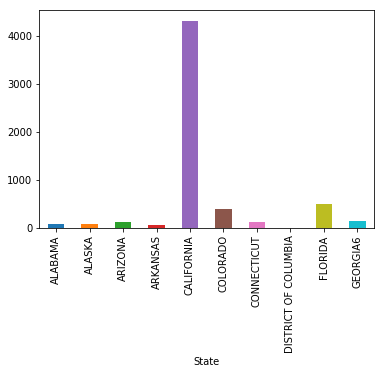

In [60]:
r.plot.bar()
# draws arson incidents by state

## Example 3

In this example we will analyze data collected from IMDB. First, we will read data saved in the filepath. Since we are dealing with large dataset we will print column values this will help with our data analysis. Having that we can categorize the data and verify its category, separate numerical and non numeriac values. Next, we will look for features with blank or NaN values. we will display data example by simplifying movie score and present the table with director ratings. 

In [61]:
web_scrape = FILEPATH + '/movie_metadata.csv'  
# csv is saved in same directory as notebook
web = pd.read_csv(web_scrape)  
# reading csv and store value in web variable
web

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


Since we are dealing with a large dataset we can print the column values this will help to analize the data. 

In [62]:
print(web.columns.values)
# prints column's value

['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


Now, we can select which features are categorical and which are numerical:
- Categorical:
Color, Director name, Actor 1 name, Actor 2 name, Actor 3 name, Genres, Language, Country, Content Rating, Movie title, Plot keywords, Movie IMDb link
- numerical:
Number of critics for reviews, Duration, Director Facebook likes, Actor 1 Facebook likes, Actor 2 Facebook likes, Actor 3 Facebook likes, Gross, Number of voted users, Cast total Facebook likes, Number of faces in poster, Number of users for reviews, Budget, Title year, IMDb score, Aspect ratio, Movie Facebook likes

Next, we will analize which features contain blank, null or empty values

In [63]:
incomplete = web.columns[pd.isnull(web).any()].tolist()
web[incomplete].info()
# analizes empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
color                      5024 non-null object
director_name              4939 non-null object
num_critic_for_reviews     4993 non-null float64
duration                   5028 non-null float64
director_facebook_likes    4939 non-null float64
actor_3_facebook_likes     5020 non-null float64
actor_2_name               5030 non-null object
actor_1_facebook_likes     5036 non-null float64
gross                      4159 non-null float64
actor_1_name               5036 non-null object
actor_3_name               5020 non-null object
facenumber_in_poster       5030 non-null float64
plot_keywords              4890 non-null object
num_user_for_reviews       5022 non-null float64
language                   5031 non-null object
country                    5038 non-null object
content_rating             4740 non-null object
budget                     4551 non-null float64
title_year          

In [52]:
web.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


We can simplify the classification into binary regression and treat all movies with IMDb score of 7.0 or higher as "good"(value 1) and all below as bad (value 0).

In [64]:
web.loc[ web['imdb_score'] < 7.0, 'imdb_score'] = 0
web.loc[ web['imdb_score'] >= 7.0, 'imdb_score'] = 1
#simplyfies score value
web.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.0,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,1.0,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,0.0,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,1.0,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1.0,NaN,0


The table below present director's rating

In [65]:
web[["director_name", "imdb_score"]].groupby(['director_name'], as_index=False).mean().sort_values(by='imdb_score', ascending=False)
# displays simplyfied director's rating

,director_name,imdb_score
1277,Ken Loach,1.0
353,Christian Carion,1.0
589,Don Kempf,1.0
2020,Sam Martin,1.0
593,Don Siegel,1.0
1620,Mitchell Altieri,1.0
596,Doug Atchison,1.0
597,Doug Block,1.0
1622,Molly Bernstein,1.0
600,Doug Walker,1.0
